In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
file1 = "results-RF-anne.json"
file2= "results-RF-nadja.json"

with open(file1) as f:
    data1 = json.load(f)
print(len(data1))

with open(file2) as f:
    data2 = json.load(f)
print(len(data2))

in_total = data1 + data2
print(len(in_total))

73
116
189


In [ ]:
# save json file as data frame


In [3]:
# create an empty list to store dataframes
dfs1 = []

# iterate through each entry in the json data
for entry in data1:
    # extract relevant information and results
    model_info = entry['model_info']
    results_unstratified = entry['unstratified_results']
    results_stratified = entry['stratified_results']

    # create a dataframe with the desired columns
    df_entry = pd.DataFrame({
        'model': [model_info['model']],
        'transformation': [model_info['transformation']],
        'n_train': [model_info['n_train']],
        'n_features': [model_info['n_features']],
        'n_groups': [model_info['n_groups']],
        'n_folds': [model_info['n_folds']],
        'n_iter': [model_info['n_iter']],
        'noise': [model_info['FD_noise']],
        'scoring': [model_info['scoring']],
        'seed': [entry['seed']],
        'random_state': [entry['random_state']],
        'hyperparameters_same': [entry['hyperparameters_same']],
        'train_r2_unstratified': [results_unstratified['train r2']],
        'test_r2_unstratified': [results_unstratified['test r2']],
        'train_mse_unstratified': [results_unstratified['train mse']],
        'test_mse_unstratified': [results_unstratified['test mse']],
        'train_mae_unstratified': [results_unstratified['train mae']],
        'test_mae_unstratified': [results_unstratified['test mae']],
        'train_r2_stratified': [results_stratified['train r2']],
        'test_r2_stratified': [results_stratified['test r2']],
        'train_mse_stratified': [results_stratified['train mse']],
        'test_mse_stratified': [results_stratified['test mse']],
        'train_mae_stratified': [results_stratified['train mae']],
        'test_mae_stratified': [results_stratified['test mae']],
    })

    # append the dataframe to the list
    dfs1.append(df_entry)

# concatenate all dataframes in the list into a single dataframe
df1 = pd.concat(dfs1, ignore_index=True)

# display the resulting dataframe
print(df1)
print(df1.shape)


                    model transformation  n_train  n_features  n_groups  \
0   RandomForestRegressor            log      500          10        20   
1   RandomForestRegressor            log      500          10        20   
2   RandomForestRegressor            log      500          10        20   
3   RandomForestRegressor            log      500          10        20   
4   RandomForestRegressor            log      500          10        20   
..                    ...            ...      ...         ...       ...   
68  RandomForestRegressor           sqrt      200          10        20   
69  RandomForestRegressor           sqrt      200          10        20   
70  RandomForestRegressor           sqrt      200          10        20   
71  RandomForestRegressor           sqrt      200          10        20   
72  RandomForestRegressor           sqrt      200          10        20   

    n_folds  n_iter  noise                 scoring  seed  ...  \
0         5     100    0.0  neg_me

In [28]:
# create an empty list to store dataframes
dfs2 = []

# iterate through each entry in the json data
for entry in data2:
    # extract relevant information and results
    model_info = entry['model_info']
    results_unstratified = entry['unstratified_results']
    results_stratified = entry['stratified_results']

    # create a dataframe with the desired columns
    df_entry = pd.DataFrame({
        'model': [model_info['model']],
        'transformation': [model_info['transformation']],
        'n_train': [model_info['n_train']],
        'n_features': [model_info['n_features']],
        'n_groups': [model_info['n_groups']],
        'n_folds': [model_info['n_folds']],
        'n_iter': [model_info['n_iter']],
        'noise': [model_info['FD_noise']],
        'scoring': [model_info['scoring']],
        'seed': [entry['seed']],
        'random_state': [entry['random_state']],
        'hyperparameters_same': [entry['hyperparameters_same']],
        'train_r2_unstratified': [results_unstratified['train r2']],
        'test_r2_unstratified': [results_unstratified['test r2']],
        'train_mse_unstratified': [results_unstratified['train mse']],
        'test_mse_unstratified': [results_unstratified['test mse']],
        'train_mae_unstratified': [results_unstratified['train mae']],
        'test_mae_unstratified': [results_unstratified['test mae']],
        'train_r2_stratified': [results_stratified['train r2']],
        'test_r2_stratified': [results_stratified['test r2']],
        'train_mse_stratified': [results_stratified['train mse']],
        'test_mse_stratified': [results_stratified['test mse']],
        'train_mae_stratified': [results_stratified['train mae']],
        'test_mae_stratified': [results_stratified['test mae']],
    })

    # append the dataframe to the list
    dfs2.append(df_entry)

# concatenate all dataframes in the list into a single dataframe
df2 = pd.concat(dfs2, ignore_index=True)

# display the resulting dataframe
df2.head()
print(df2.shape)

(116, 24)


In [29]:
data = pd.concat([df1, df2], ignore_index=True)
print(data.shape)
data

# drop n_train = 500
data = data[data.n_train != 500]
print(data.shape)

# are there any duplicates in data
print(data.duplicated().sum())

# drop duplicates
data = data.drop_duplicates()
print(data.shape)


(189, 24)
(166, 24)
12
(154, 24)


In [30]:
data.groupby([data['hyperparameters_same']]).count()

,model,transformation,n_train,n_features,n_groups,n_folds,n_iter,noise,scoring,seed,...,train_mse_unstratified,test_mse_unstratified,train_mae_unstratified,test_mae_unstratified,train_r2_stratified,test_r2_stratified,train_mse_stratified,test_mse_stratified,train_mae_stratified,test_mae_stratified
hyperparameters_same,,,,,,,,,,,,,,,,,,,,,
False,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
True,119,119,119,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119


In [31]:
# percentage of hyperparameters_same = False
print(100*data.groupby([data['hyperparameters_same']]).count()['model']/data.shape[0])


hyperparameters_same
False    22.727273
True     77.272727
Name: model, dtype: float64


In [32]:
# give summary of every column
data_desciptives = data.loc[:, ['transformation', 'n_train', 'n_features', 'n_groups','n_folds', 'n_iter', 'noise', 'scoring']]
# in data_desciptives make all columns categorical
data_desciptives = data_desciptives.astype('category')

# show summary of every column
data_desciptives.describe(include='all')


,transformation,n_train,n_features,n_groups,n_folds,n_iter,noise,scoring
count,154,154,154,154,154,154,154.0,154
unique,2,2,1,2,1,1,3.0,3
top,identity,1000,10,20,5,200,0.0,neg_mean_squared_error
freq,100,104,154,110,154,154,84.0,114


In [33]:
# Display unique values for each column
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in transformation: ['identity', 'sqrt']
Categories (2, object): ['identity', 'sqrt']
Unique values in n_train: [200, 1000]
Categories (2, int64): [200, 1000]
Unique values in n_features: [10]
Categories (1, int64): [10]
Unique values in n_groups: [10, 20]
Categories (2, int64): [10, 20]
Unique values in n_folds: [5]
Categories (1, int64): [5]
Unique values in n_iter: [200]
Categories (1, int64): [200]
Unique values in noise: [0.0, 0.5, 2.0]
Categories (3, float64): [0.0, 0.5, 2.0]
Unique values in scoring: ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
Categories (3, object): ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']


In [34]:
# Display unique values for each column with counts
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].value_counts()
    print(f"Unique values in {column}: \n{unique_values}")

Unique values in transformation: 
transformation
identity    100
sqrt         54
Name: count, dtype: int64
Unique values in n_train: 
n_train
1000    104
200      50
Name: count, dtype: int64
Unique values in n_features: 
n_features
10    154
Name: count, dtype: int64
Unique values in n_groups: 
n_groups
20    110
10     44
Name: count, dtype: int64
Unique values in n_folds: 
n_folds
5    154
Name: count, dtype: int64
Unique values in n_iter: 
n_iter
200    154
Name: count, dtype: int64
Unique values in noise: 
noise
0.0    84
2.0    60
0.5    10
Name: count, dtype: int64
Unique values in scoring: 
scoring
neg_mean_squared_error     114
neg_mean_absolute_error     20
r2                          20
Name: count, dtype: int64


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(data200, data1000, metric='r2', order=None):
    if order is None:
        order = [
            f'test_{metric}_unstratified', 
            f'test_{metric}_stratified'
        ]

    df_melted200 = pd.melt(data200, value_vars=order, var_name='Metric', value_name='Value')
    df_melted1000 = pd.melt(data1000, value_vars=order, var_name='Metric', value_name='Value')

    fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=False)

    for i in range(2):
        if i == 0:
            df_melted = df_melted200
            df=data200
            n_samples=200
        else:
            df_melted = df_melted1000    
            df=data1000
            n_samples=1000
        ax = sns.boxplot(x='Metric', y='Value', data=df_melted, ax=axes[i],
                         order=order,
                         showmeans=True,
                         meanline=True,
                         color="grey",
                         meanprops={"marker": "+",
                                    "markerfacecolor": "white",
                                    "markeredgecolor": "green",
                                    "markersize": "10"},
                         width=.5,
                         #linecolor="#137", linewidth=.75,
                    
                         medianprops={"color": "#137", "linewidth": 1})
        ax.set_ylabel(metric.upper())
        ax.set_xlabel('')
        plt.text(0.98, 0.98, f'N = {len(df)}', horizontalalignment='right', verticalalignment='top',
                 transform=ax.transAxes, size=14)
        xtickNames = plt.setp(ax, xticklabels=['Test Unstratified', 'Test Stratified'])
        plt.setp(xtickNames, rotation=0)
        ax.set_title(f'{n_samples} train samples')

    plt.show()

/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

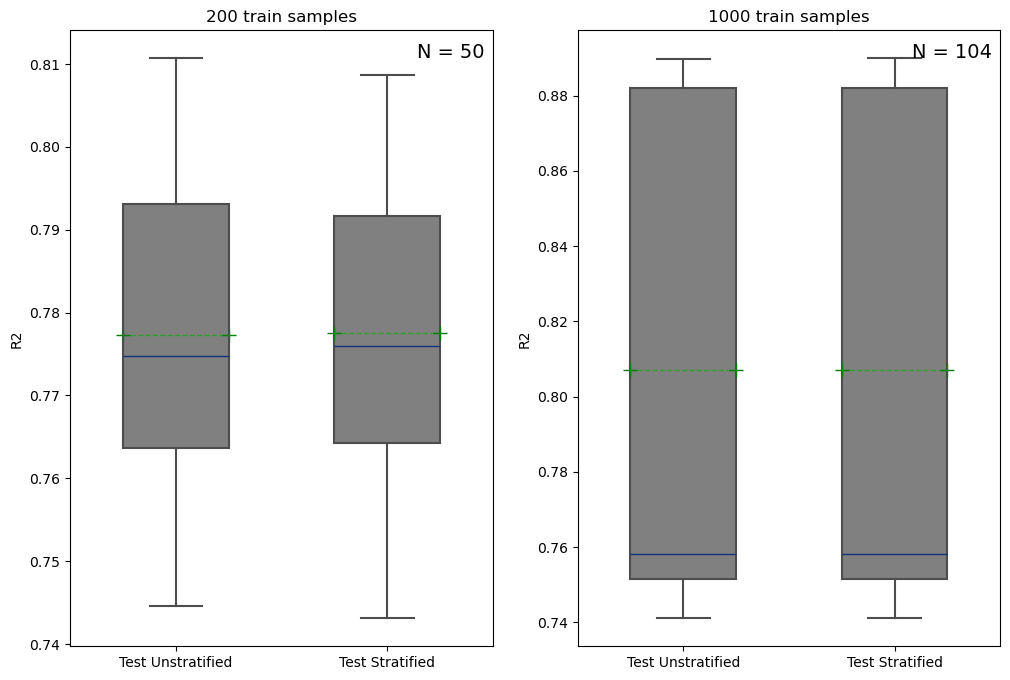

In [67]:
data_filtered_200 = data[(data['n_train'] == 200)]
data_filtered_1000 = data[(data['n_train'] == 1000)]

plot_boxplots(data_filtered_200, data_filtered_1000, metric='r2')

/var/folders/zc/vg3k9bwn1gg90h8k27s5lxrh0000gn/T/ipykernel_43554/2961357118.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered_200 = data_filtered[(data['n_train'] == 200)]
/var/folders/zc/vg3k9bwn1gg90h8k27s5lxrh0000gn/T/ipykernel_43554/2961357118.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered_1000 = data_filtered[(data['n_train'] == 1000)]
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

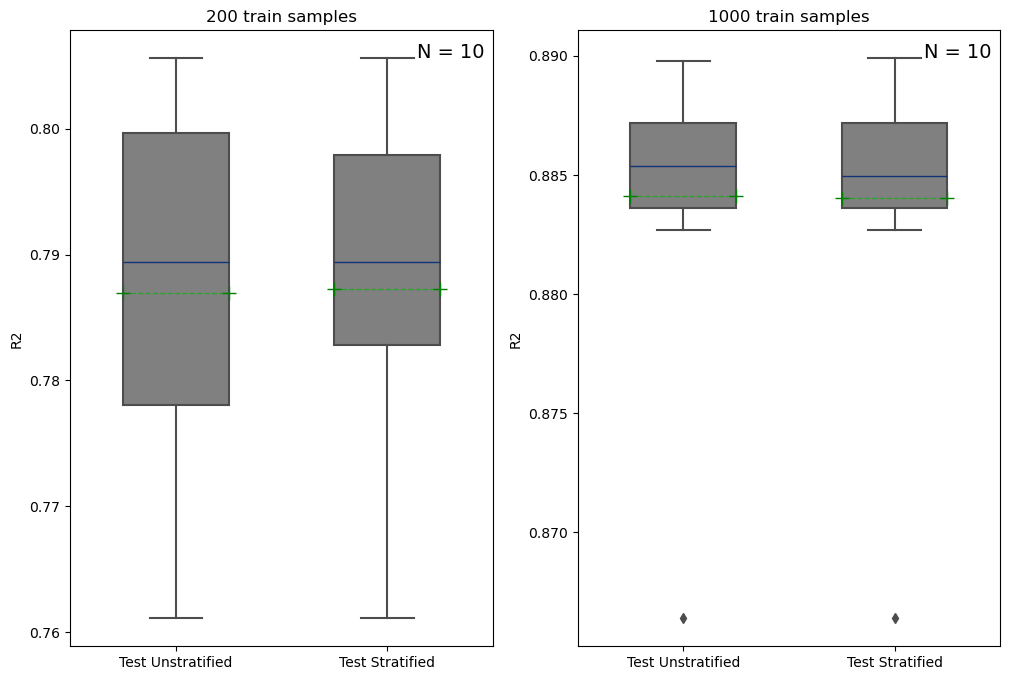

In [68]:
data_filtered = data[(data['model'] == 'RandomForestRegressor') & (data['transformation'] == 'identity')  & (data['n_features'] == 10) & (data['n_groups'] == 10) & (data['n_folds'] == 5) & (data['n_iter'] == 200) & (data['noise'] == 0) & (data['scoring'] == 'neg_mean_squared_error')]
data_filtered_200 = data_filtered[(data['n_train'] == 200)]
data_filtered_1000 = data_filtered[(data['n_train'] == 1000)]

plot_boxplots(data_filtered_200, data_filtered_1000, metric='r2')

/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

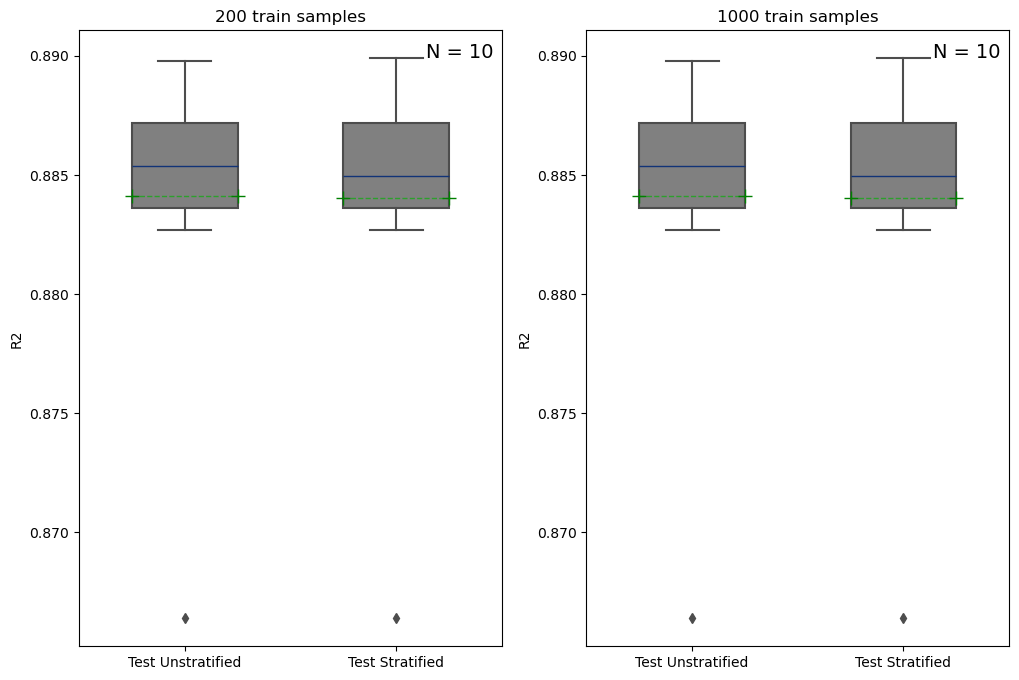

In [69]:
data_filtered = data[(data['model'] == 'RandomForestRegressor') & (data['transformation'] == 'identity') & (data['n_train'] == 1000) & (data['n_features'] == 10)  & (data['n_folds'] == 5) & (data['n_iter'] == 200) & (data['noise'] == 0.0) & (data['scoring'] == 'neg_mean_squared_error')]
data_filtered_200 = data_filtered[(data_filtered['n_groups'] == 10)]
data_filtered_1000 = data_filtered[(data_filtered['n_groups']== 20)]

plot_boxplots(data_filtered_200, data_filtered_1000, metric='r2')

In [64]:
data_filtered = data[(data['model'] == 'RandomForestRegressor') & (data['transformation'] == 'identity')  &  (data['n_train'] == 1000) & (data['n_features'] == 10) & (data['n_groups'] == 10) & (data['n_folds'] == 5) & (data['n_iter'] == 200) & (data['noise'] == 0) & (data['scoring'] == 'neg_mean_squared_error')]
data_filtered_1= data_filtered[(data['n_train'] == 200)]
data_filtered_2 = data_filtered[(data['n_train'] == 1000)]

plot_boxplots(data_filtered_1, data_filtered_2, metric='r2')

(10, 24)

In [54]:
filter

model              RandomForestRegressor
transformation                  identity
n_train                             1000
n_features                            10
n_groups                              10
n_folds                                5
n_iter                               200
noise                                0.0
scoring           neg_mean_squared_error
Name: 99, dtype: object

In [53]:
# colum names data
print(data.columns)

# filter ['model', 'transformation', 'n_train', 'n_features', 'n_groups','n_folds', 'n_iter', 'noise'
filter = data.loc[99, ['model', 'transformation', 'n_train', 'n_features', 'n_groups','n_folds', 'n_iter', 'noise', 'scoring']]
filter

def filter_data(data, filter):
    data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7])]
    return data_filtered

# filter data with filter values
data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7])]
data_filtered


Index(['model', 'transformation', 'n_train', 'n_features', 'n_groups',
       'n_folds', 'n_iter', 'noise', 'scoring', 'seed', 'random_state',
       'hyperparameters_same', 'train_r2_unstratified', 'test_r2_unstratified',
       'train_mse_unstratified', 'test_mse_unstratified',
       'train_mae_unstratified', 'test_mae_unstratified',
       'train_r2_stratified', 'test_r2_stratified', 'train_mse_stratified',
       'test_mse_stratified', 'train_mae_stratified', 'test_mae_stratified'],
      dtype='object')


/var/folders/zc/vg3k9bwn1gg90h8k27s5lxrh0000gn/T/ipykernel_43554/2732254034.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7])]


,model,transformation,n_train,n_features,n_groups,n_folds,n_iter,noise,scoring,seed,...,train_mse_unstratified,test_mse_unstratified,train_mae_unstratified,test_mae_unstratified,train_r2_stratified,test_r2_stratified,train_mse_stratified,test_mse_stratified,train_mae_stratified,test_mae_stratified
91,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4984,3.1744,0.5415,1.4157,0.9783,0.8664,0.4984,3.1744,0.5415,1.4157
92,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4108,2.6791,0.4967,1.2932,0.9830,0.8872,0.4108,2.6791,0.4967,1.2932
93,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.3739,2.7088,0.4783,1.3025,0.9845,0.8851,0.3770,2.7288,0.4781,1.3077
94,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.3958,2.6172,0.4980,1.2811,0.9843,0.8898,0.3958,2.6172,0.4980,1.2811
95,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5535,2.7862,0.5773,1.3266,0.9767,0.8827,0.5535,2.7862,0.5773,1.3266
96,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4229,2.7359,0.5154,1.3246,0.9827,0.8848,0.4229,2.7359,0.5154,1.3246
97,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5310,2.6228,0.5675,1.2885,0.9758,0.8899,0.5987,2.6159,0.6022,1.2883
98,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5936,2.6797,0.5997,1.3070,0.9753,0.8872,0.5936,2.6797,0.5997,1.3070
99,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5548,2.7689,0.5741,1.3217,0.9759,0.8835,0.5548,2.7689,0.5741,1.3217
100,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5397,2.7578,0.5609,1.3120,0.9773,0.8839,0.5397,2.7578,0.5609,1.3120


In [25]:
def filter_data(data, filter):
    data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7]) & (data['scoring'] == filter[8])]
    return data_filtered
print(filter)
print(type(filter))
filter_data(data, filter)

model              RandomForestRegressor
transformation                  identity
n_train                             1000
n_features                            10
n_groups                              10
n_folds                                5
n_iter                               200
noise                                0.0
scoring           neg_mean_squared_error
Name: 99, dtype: object
<class 'pandas.core.series.Series'>


/var/folders/zc/vg3k9bwn1gg90h8k27s5lxrh0000gn/T/ipykernel_43554/2610065146.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7]) & (data['scoring'] == filter[8])]


,model,transformation,n_train,n_features,n_groups,n_folds,n_iter,noise,scoring,seed,...,train_mse_unstratified,test_mse_unstratified,train_mae_unstratified,test_mae_unstratified,train_r2_stratified,test_r2_stratified,train_mse_stratified,test_mse_stratified,train_mae_stratified,test_mae_stratified
91,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4984,3.1744,0.5415,1.4157,0.9783,0.8664,0.4984,3.1744,0.5415,1.4157
92,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4108,2.6791,0.4967,1.2932,0.9830,0.8872,0.4108,2.6791,0.4967,1.2932
93,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.3739,2.7088,0.4783,1.3025,0.9845,0.8851,0.3770,2.7288,0.4781,1.3077
94,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.3958,2.6172,0.4980,1.2811,0.9843,0.8898,0.3958,2.6172,0.4980,1.2811
95,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5535,2.7862,0.5773,1.3266,0.9767,0.8827,0.5535,2.7862,0.5773,1.3266
96,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.4229,2.7359,0.5154,1.3246,0.9827,0.8848,0.4229,2.7359,0.5154,1.3246
97,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5310,2.6228,0.5675,1.2885,0.9758,0.8899,0.5987,2.6159,0.6022,1.2883
98,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5936,2.6797,0.5997,1.3070,0.9753,0.8872,0.5936,2.6797,0.5997,1.3070
99,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5548,2.7689,0.5741,1.3217,0.9759,0.8835,0.5548,2.7689,0.5741,1.3217
100,RandomForestRegressor,identity,1000,10,10,5,200,0.0,neg_mean_squared_error,100,...,0.5397,2.7578,0.5609,1.3120,0.9773,0.8839,0.5397,2.7578,0.5609,1.3120


In [26]:
data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7]) & (data['scoring'] == filter[8])]
    

/var/folders/zc/vg3k9bwn1gg90h8k27s5lxrh0000gn/T/ipykernel_43554/4238196068.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_filtered = data[(data['model'] == filter[0]) & (data['transformation'] == filter[1]) & (data['n_train'] == filter[2]) & (data['n_features'] == filter[3]) & (data['n_groups'] == filter[4]) & (data['n_folds'] == filter[5]) & (data['n_iter'] == filter[6]) & (data['noise'] == filter[7]) & (data['scoring'] == filter[8])]


In [55]:
def create_boxplot(df, metric, title):

    order = [
        f'train_{metric}_unstratified', f'train_{metric}_stratified',
        f'test_{metric}_unstratified', f'test_{metric}_stratified'
    ]
    df_melted = pd.melt(df, value_vars=order, var_name='Metric', value_name='Value')
    plt.figure(figsize=(7, 8))
    ax = sns.boxplot(x='Metric', y='Value', #hue='Stratification', 
                     data=df_melted,
                     order=order,
                     showmeans=True,
                     meanline=True,
                     color= "grey",
                     meanprops={"marker":"+",
                                "markerfacecolor":"white", 
                                "markeredgecolor":"green",
                                "markersize":"10"},
                                width=.5,
                                linecolor="#137", linewidth=.75,
                                medianprops={"color": "#137", "linewidth": 1})
    ax.set_xlabel('')
    ax.set_ylabel(metric.upper())
    #plt.xticks(rotation=0, ha='center', labels=['Train Unstratified', 'Train Stratified', 'Test Unstratified', 'Test Stratified'])
    xtickNames = plt.setp(ax, xticklabels=['Train Unstratified', 'Train Stratified', 'Test Unstratified', 'Test Stratified'])
    plt.setp(xtickNames, rotation=0)

    plt.title(title)
    
    
    plt.show()

In [27]:
metric='r2'
create_boxplot(data, metric, 'Comparison of Stratified and Unstratified R²')

NameError: name 'create_boxplot' is not defined

C:\Users\anneg\AppData\Local\Temp\ipykernel_19172\3300873400.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xtickNames = plt.setp(ax, xticklabels=['Train Unstratified', 'Train Stratified', 'Test Unstratified', 'Test Stratified'])


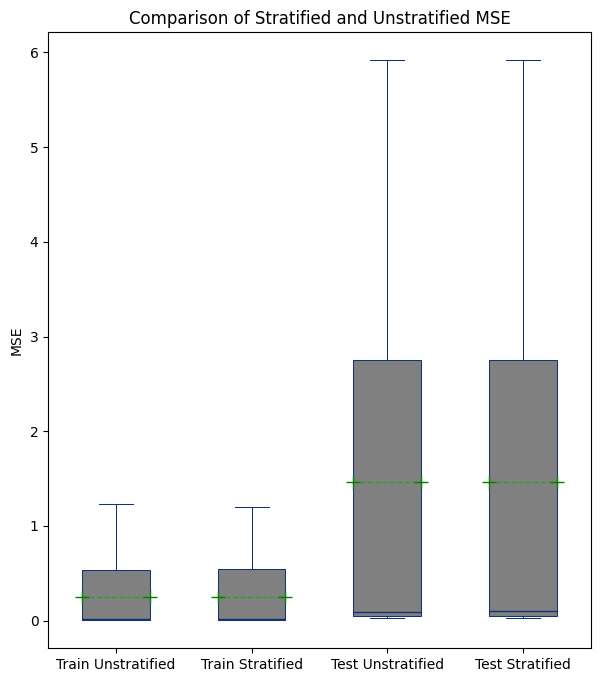

In [15]:
create_boxplot(data, 'mse', 'Comparison of Stratified and Unstratified MSE')

C:\Users\anneg\AppData\Local\Temp\ipykernel_19172\3300873400.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xtickNames = plt.setp(ax, xticklabels=['Train Unstratified', 'Train Stratified', 'Test Unstratified', 'Test Stratified'])


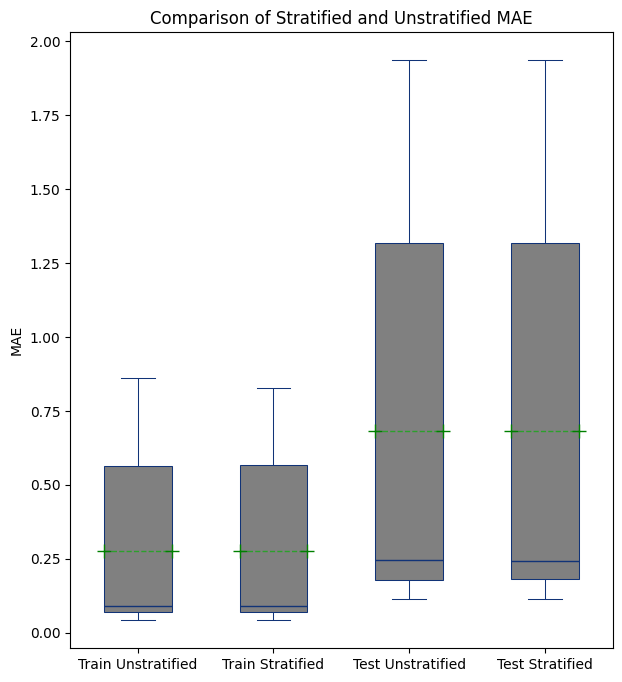

In [16]:
create_boxplot(data, 'mae', 'Comparison of Stratified and Unstratified MAE')